In [13]:
import pandas as pd 
import numpy as np
import re
import contractions
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dtypes = {
    'user_followers': 'str',
    'user_friends': 'str',
    'user_favourites': 'str',
    'user_verified': 'str',
    'is_retweet': 'boolean'
}
chunk = pd.read_csv('Bitcoin_tweets.csv',chunksize=100000,lineterminator='\n',dtype=dtypes)
data = pd.concat(chunk)

In [15]:
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689349,TAnotepad,Not financial advice,#Bitcoin | Forever Alone Crypto Trader 😭 | Ana...,2022-11-04 10:18:11,674,1789,27466,False,2023-01-06 17:46:35,"Bitcoin squeeze is SUPER TIGHT, which way will...","['BTC', 'bitcoin', 'Crypto', 'cryptocurrency',...",Twitter for Android,False
4689350,Boba-Feh,South of the North Pole,My backpack has jets. Reformed Necromonger,2008-04-02 21:48:47,79,454,125,False,2023-01-06 17:46:29,Closed #BTC short at 16725. Missed my long pla...,['BTC'],Twitter for Android,False
4689351,Ethereum Yoda,NaN,UP or DOWN...\n.\n.\n.\n.\nPrice matters NOT.,2022-07-24 04:50:18,532,1,0,False,2023-01-06 17:46:22,#Ethereum price update: \n\n#ETH $1263.59 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",Twitter Web App,False
4689352,Bitcoin Price Ticker,NaN,Tweets the current price of #bitcoin every 5 m...,2022-10-20 07:10:38,83,7,9,False,2023-01-06 17:46:20,1₿ = $16814.7 -0.07%🔻\n\nDetails:\nChange: 🔻-1...,"['bitcoin', 'btc']",BitcoinLivePriceTicker,False


In [16]:
df = data.copy()

# Checking info of dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689354 entries, 0 to 4689353
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    object 
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        boolean
dtypes: boolean(1), object(12)
memory usage: 438.3+ MB


# Data Preprocessing

In [18]:
# drop row with null values in 'date' and 'text' columns
df.dropna(axis=0 ,subset=['date','text'],inplace = True)
df.reset_index(drop= True,inplace=True)
df.shape

(4689354, 13)

In [19]:
# drop duplicated rows
df.drop_duplicates(inplace = True)
df.reset_index(drop=True,inplace=True)
df.shape

(4689354, 13)

In [20]:
# convert to most relevant dtypes
df = df.convert_dtypes()
df.dtypes

user_name           string[python]
user_location       string[python]
user_description    string[python]
user_created        string[python]
user_followers      string[python]
user_friends        string[python]
user_favourites     string[python]
user_verified       string[python]
date                string[python]
text                string[python]
hashtags            string[python]
source              string[python]
is_retweet                 boolean
dtype: object

In [21]:
#Remove the 'date' that is not 19 number of character
df = df[df['date'].str.len()==19]
df.shape

(4689288, 13)

In [22]:
# change dtypes of 'date' column
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [23]:
df['user_created'] = pd.to_datetime(df['user_created'], format='%Y-%m-%d %H:%M:%S')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4689288 entries, 0 to 4689353
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_name         string        
 1   user_location     string        
 2   user_description  string        
 3   user_created      datetime64[ns]
 4   user_followers    string        
 5   user_friends      string        
 6   user_favourites   string        
 7   user_verified     string        
 8   date              datetime64[ns]
 9   text              string        
 10  hashtags          string        
 11  source            string        
 12  is_retweet        boolean       
dtypes: boolean(1), datetime64[ns](2), string(10)
memory usage: 474.0 MB


In [25]:
#timeframe of dataset
print(df['date'].min())
print(df['date'].max())

2021-02-05 10:52:04
2023-01-09 23:59:54


# Text Processing

In [26]:
def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

In [27]:
def text_processing(text, default_replace=""):
    if text is not None and isinstance(text, str):        # convert review to lower case
        text = text.lower()
    
        # Remove non-alphanumeric characters
        # @\[A-Za-z0-9]+ matches any @username pattern.
        # ([^0-9A-Za-z \t]) matches any character that is not a digit, letter, or tab.
        # (\w+:\/\/\S+) matches any URL pattern.
        # ^rt matches the word "rt" at the beginning of the string.
        # http.+? matches any HTTP URL pattern.
        
        # Define the regular expression pattern
        pattern = r'(\n|@\w+|[^\w\s\t]|(https?://\S+)|^rt|http\S+)'

        # Use re.sub to replace the matched patterns with the default_replace value
        text = re.sub(pattern, default_replace, text)
    else:
        # Handle the case when the input text is None or null
        # You can choose to do nothing, return a default value, or raise an exception.
        text = default_replace
    return text

In [28]:
def custom_tokenize(text):
  
    token_list = word_tokenize(text)

    #remove punctuation
    token_list = [token for token in token_list
                   if token not in string.punctuation]

    
    #keep  alphabets only
    token_list = [token for token in token_list if token.isalpha()]
    
    #Remove stopwords

    stop_words = set(stopwords.words('english'))
    #stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

    return token_list

In [29]:
def process_review(text):
    
    text = text_processing(text)
    text = fix_contractions(text)
    tokens = custom_tokenize(text)

    return tokens

In [30]:
def count_frequency(tokens):
    word_count = {}
    for  token in tokens:
        for word in token:
        
            if word in word_count.keys():
                word_count[word] +=1
            else:
                word_count[word] = 1
    return word_count

## Remove tweets contain irrelevant hashtags

In [31]:
# lowercase hashtag 
df['hashtags'] = df['hashtags'].str.lower()

In [32]:
df['hashtags']

0                                                ['bitcoin']
1                  ['thursday', 'btc', 'wallet', 'security']
2                                                       <NA>
3                         ['bitcoin', 'fx', 'btc', 'crypto']
4                                                    ['btc']
                                 ...                        
4689349    ['btc', 'bitcoin', 'crypto', 'cryptocurrency',...
4689350                                              ['btc']
4689351    ['ethereum', 'eth', 'bitcoin', 'btc', 'altcoin...
4689352                                   ['bitcoin', 'btc']
4689353                       ['faucet', 'cointiply', 'btc']
Name: hashtags, Length: 4689288, dtype: string

In [33]:
irrelevant_hashtags = ['nft','giveaway','cashback','airdrop','lightningnetwork','lightning','network','ln',"彩票", 'bet', 'casino', 'betting', 'reload','reloaded']

In [34]:
# Remove tweets that contain irrelevant hashtags 
df = df[df['hashtags'].str.contains('|'.join(irrelevant_hashtags)) == False].reset_index(drop = True)

In [35]:
# Find the row that contains the hashtag "lightning"
find_row = df[df["hashtags"].str.contains("bet")]

# Print the data for the row
find_row

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet


## Text Normalization

In [36]:
df.dtypes

user_name           string[python]
user_location       string[python]
user_description    string[python]
user_created        datetime64[ns]
user_followers      string[python]
user_friends        string[python]
user_favourites     string[python]
user_verified       string[python]
date                datetime64[ns]
text                string[python]
hashtags            string[python]
source              string[python]
is_retweet                 boolean
dtype: object

In [37]:
df["token"] = df["text"].apply(process_review)

In [38]:
df['token']

0          [blue, ridge, bank, shares, halted, nyse, bitc...
1          [today, thursday, take, friend, btc, wallet, s...
2          [btc, big, chance, billion, price, bitcoin, fx...
3          [network, secured, nodes, today, soon, biggest...
4                   [ltfire, amp, mangtbitcoin, crypto, btc]
                                 ...                        
3785253    [bitcoin, squeeze, super, tight, way, break, b...
3785254    [closed, btc, short, missed, long, place, hair...
3785255    [ethereum, price, update, eth, usdbitcoin, btc...
3785256                                     [low, high, btc]
3785257    [earn, crypto, playing, fun, games, onlineget,...
Name: token, Length: 3785258, dtype: object

## Count of distinct hashtags

In [39]:
token_count = count_frequency(df["token"])
token_count = {k: v for k, v in sorted(token_count.items(), key=lambda item: item[1],reverse=True)}
token_count_df = pd.DataFrame(token_count.keys(), columns=["Hashtag_Word"])
token_count_df["Count"] = token_count.values()
token_count_df

,Hashtag_Word,Count
0,bitcoin,2766516
1,btc,2092703
2,crypto,1010529
3,price,603794
4,eth,588455
...,...,...
888421,okusdd,1
888422,startedshort,1
888423,blockchainhokkaido,1
888424,blockfegtoken,1


In [40]:
token_count_df[token_count_df['Hashtag_Word']==r'[\u4e00-\u9fff]+'] #show chinese character in the postive hashtags

,Hashtag_Word,Count


In [41]:
token_count_df.shape

(888426, 2)

In [42]:
def wordcount_plot(data_df):
    data = data_df[0:10]
    print(data)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 8))
    sns.barplot(x="Count", y="Hashtag_Word", data=data,)
    plt.title(label="Top 20 hashtags count")
    plt.xlabel("Hashtags")        
    plt.ylabel("Count")
    plt.show()

     Hashtag_Word    Count
0         bitcoin  2766516
1             btc  2092703
2          crypto  1010529
3           price   603794
4             eth   588455
5  cryptocurrency   536804
6        ethereum   339954
7         binance   266793
8             bnb   252759
9             buy   223850


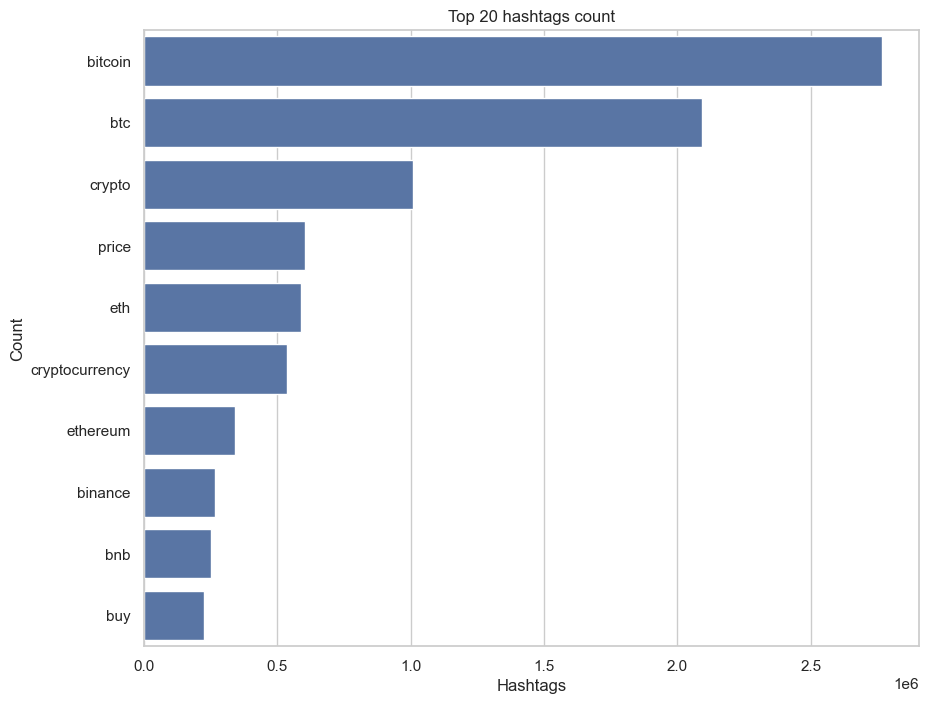

In [43]:
wordcount_plot(token_count_df)

# Sentiment Analysis

## Sentiment Analysis on Tweets

In [ ]:
df[['polarity', 'subjectivity']] = df['token'].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))

In [ ]:
# 'sentiment' column in binary form
df['sentiment'] = df['polarity'].apply(lambda x: -1 if x < 0 else 1 if x > 0 else 0)

In [ ]:
df

# Dataframe Aggregation 

##  Bitcoin Price Data

In [ ]:
# input bitcoin price data
price = pd.read_csv('BTC-USD.csv')

In [ ]:
price.head()

In [ ]:
# Change 'Date' to date dtypes
price['Date'] = pd.to_datetime(price['Date'],format='%Y-%m-%d')

In [ ]:
price.info()

In [ ]:
print(price['Date'].min())
print(price['Date'].max())

In [ ]:
price['Date'] = pd.to_datetime(price['Date'],format='%Y-%m-%d')

In [ ]:
price.dtypes

## Tweets data

In [10]:
# extract 'date only'
daily_tweet = df
daily_tweet['date_only'] = pd.to_datetime(daily_tweet['date'].dt.date,format='%Y-%m-%d')

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
daily_tweet.head(3)

In [ ]:
#plotting histogram
# Plot the distribution graph
plt.hist(daily_tweet["polarity"])
plt.show()

plt.hist(daily_tweet["subjectivity"])
plt.show()

plt.hist(daily_tweet["sentiment"])
plt.show()


In [ ]:
# group tweet volume, polarity and subjectivity by 'date_only'
daily_tweet = daily_tweet.groupby('date_only').agg({'text':'count', 'polarity':'mean', 
                                                    'subjectivity':'mean', 'sentiment':'mean'})

daily_tweet = pd.DataFrame(daily_tweet)
daily_tweet.reset_index(inplace=True)
daily_tweet = daily_tweet.rename(columns={'date_only': 'Date','text':'tweet_count'})
print(daily_tweet.info())
daily_tweet.head()

## Elon Musk Sentiment

In [ ]:
elon = pd.read_excel("elon tweet.xlsx")
elon = elon.groupby('Date')['Sentiment'].mean()
elon = pd.DataFrame(elon)
elon.reset_index(inplace=True)
elon = elon.rename(columns={'Sentiment': 'Elon'})
print(elon.info())
elon.head()

## Aggregation of tweets, price and elon musk tweets data

In [11]:
# Merging Tweets and Price data
tweet_price = pd.merge(price[['Date','Volume','Close']], daily_tweet, on='Date', how='left')
tweet_price = tweet_price.rename(columns={'Close': 'Price'})
tweet_price = tweet_price.dropna()
tweet_price

KeyError: 'Date'

In [12]:
# Merging 'tweet_price' with 'elon'
tweet_price_elon = pd.merge(tweet_price, elon, on='Date', how='left')
tweet_price_elon

NameError: name 'tweet_price' is not defined

In [50]:
tweet_price_elon[tweet_price_elon.duplicated('Date')] # to check any duplication

,Date,Volume,Price,tweet_count,polarity,subjectivity,sentiment,Elon


## Export processed data for modelling stage

In [51]:
input_df = tweet_price_elon.copy()

In [52]:
#input_df.to_csv('input.csv', index=False)

## EDA

In [53]:
# create 'month_year' column
tweet_price['year_month'] = tweet_price['Date'].dt.strftime('%Y-%m')
tweet_price['year_month']

35     2021-02
36     2021-02
37     2021-02
38     2021-02
39     2021-02
        ...   
725    2022-12
735    2023-01
736    2023-01
737    2023-01
738    2023-01
Name: year_month, Length: 222, dtype: object

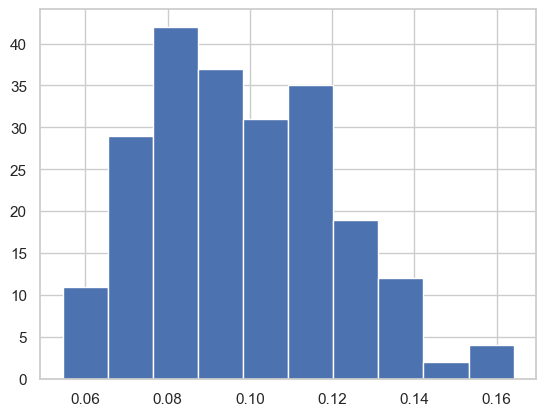

In [54]:
#plotting histogram
# Plot the distribution graph
plt.hist(tweet_price["polarity"])
plt.show()

### Aggregating tweet count and trading volume by month 

In [116]:
# Mean up the variables 
monthly = tweet_price.groupby('year_month').agg({'tweet_count':'mean', 'polarity':'mean','subjectivity':'mean', 
                                                 'sentiment':'mean','Price':'mean', 'Volume':'mean'})
monthly.reset_index(inplace=True)

In [117]:
monthly.head()

,year_month,tweet_count,polarity,subjectivity,sentiment,Price,Volume
0,2021-02,2654.076923,0.085750,0.268114,0.250866,46506.953726,7.350911e+10
1,2021-03,1513.500000,0.082168,0.230116,0.223160,57568.605469,5.623114e+10
2,2021-04,2956.250000,0.078626,0.263485,0.234200,56604.373047,6.379227e+10
3,2021-05,3868.600000,0.091290,0.306295,0.302218,37289.412500,5.024016e+10
4,2021-06,27020.250000,0.103525,0.313126,0.266352,33400.919433,4.868863e+10


In [118]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_month    24 non-null     object 
 1   tweet_count   24 non-null     float64
 2   polarity      24 non-null     float64
 3   subjectivity  24 non-null     float64
 4   sentiment     24 non-null     float64
 5   Price         24 non-null     float64
 6   Volume        24 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.4+ KB


In [119]:
monthly_corr = monthly.drop(columns=['year_month']).corr()
monthly_corr

,tweet_count,polarity,subjectivity,sentiment,Price,Volume
tweet_count,1.000000,0.473411,0.573489,0.284879,-0.029361,-0.338398
polarity,0.473411,1.000000,0.844905,0.900320,0.514160,-0.146091
subjectivity,0.573489,0.844905,1.000000,0.795632,0.254505,-0.057290
sentiment,0.284879,0.900320,0.795632,1.000000,0.608142,-0.037412
Price,-0.029361,0.514160,0.254505,0.608142,1.000000,0.425296
Volume,-0.338398,-0.146091,-0.057290,-0.037412,0.425296,1.000000


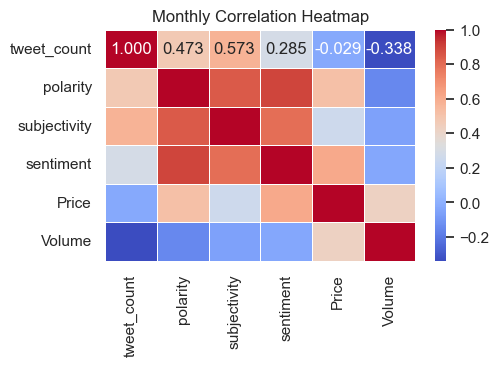

In [120]:
plt.figure(figsize=(5, 3))
sns.heatmap(monthly_corr, annot=True, fmt=".3f", cmap="coolwarm", linewidths=.5)
plt.title("Monthly Correlation Heatmap")
plt.show()

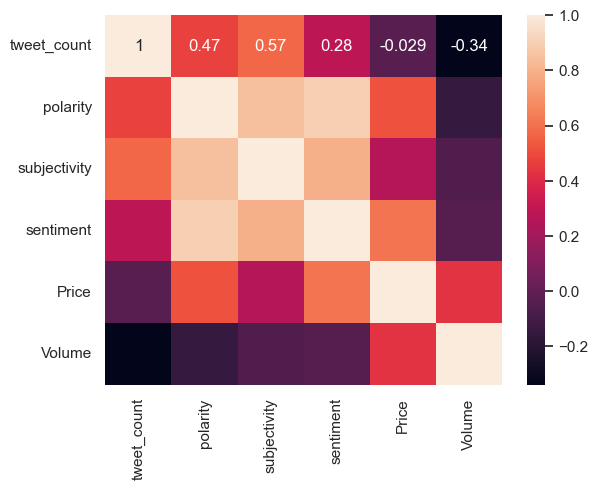

In [95]:
sns.heatmap(monthly_corr, annot=True)
plt.show()

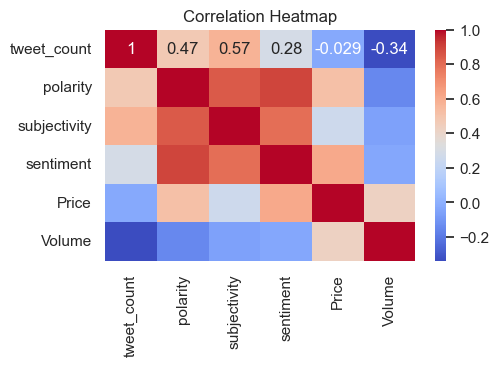

In [75]:
import seaborn as sns

# Assuming you have a DataFrame called 'df' with multiple columns

# Calculate the correlation matrix
correlation_matrix = monthly.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [268]:
monthly.drop(columns=['year_month'])

,tweet_count,polarity,subjectivity,sentiment,Price,Volume
0,2654.076923,0.085750,0.268114,0.250866,46506.953726,7.350911e+10
1,1513.500000,0.082168,0.230116,0.223160,57568.605469,5.623114e+10
2,2956.250000,0.078626,0.263485,0.234200,56604.373047,6.379227e+10
3,3868.600000,0.091290,0.306295,0.302218,37289.412500,5.024016e+10
4,27020.250000,0.103525,0.313126,0.266352,33400.919433,4.868863e+10
5,20534.368421,0.114491,0.314208,0.300173,34716.226871,2.724305e+10
6,21423.500000,0.117702,0.312631,0.320701,45884.187717,3.455277e+10
7,19075.000000,0.109721,0.317388,0.291062,44883.910156,3.915467e+10
8,30928.888889,0.103955,0.300459,0.298286,61989.938802,3.959017e+10
9,27860.300000,0.105474,0.296561,0.287221,59539.787500,3.571025e+10


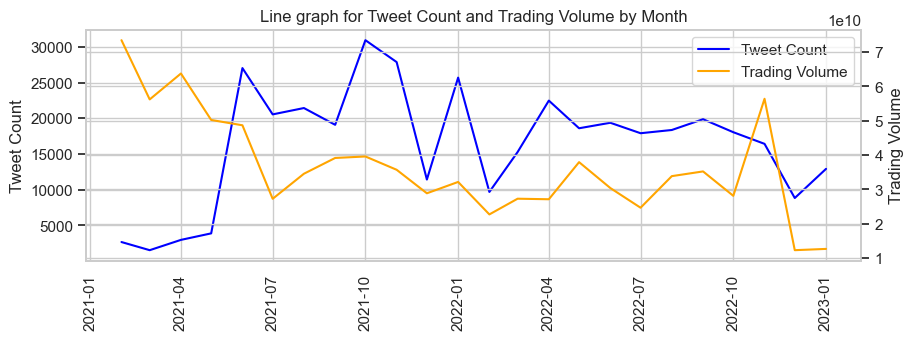

In [60]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the text_count
tweet_count = ax.plot(monthly['year_month'], monthly['tweet_count'], label='Tweet Count', color='blue')

# Plot the Volume
ax2 = ax.twinx()
Volume = ax2.plot(monthly['year_month'], monthly['Volume'], label='Trading Volume', color='orange')

# Set the labels and titles
ax.set_ylabel("Tweet Count")
ax2.set_ylabel("Trading Volume")
plt.title('Line graph for Tweet Count and Trading Volume by Month')

# concatenate graphs and legend
add = tweet_count + Volume
leg = [l.get_label() for l in add]
ax.legend(add, leg, loc=1)

# Rotate the x-axis tick labels vertically
ax.get_xaxis().set_tick_params(rotation=90)

# Show the plot
plt.show()

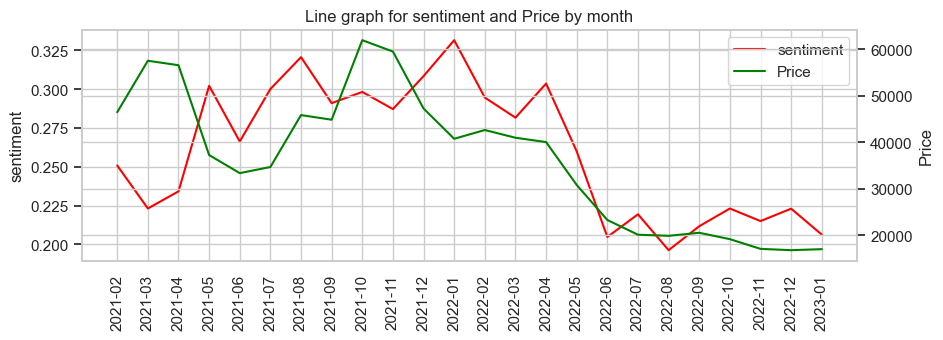

In [260]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the text_count
sentiment = ax.plot(monthly['year_month'], monthly['sentiment'], label='sentiment', color='red')

# Plot the Volume
ax2 = ax.twinx()
Price =ax2.plot(monthly['year_month'], monthly['Price'], label='Price', color='green')

# Set the labels and titles
ax.set_ylabel("sentiment")
ax2.set_ylabel("Price")
plt.title('Line graph for sentiment and Price by month')

# concatenate graphs and legend
add = sentiment + Price
leg = [l.get_label() for l in add]
ax.legend(add, leg, loc=1)

# Rotate the x-axis tick labels vertically
ax.get_xaxis().set_tick_params(rotation=90)

# Show the plot
plt.show()

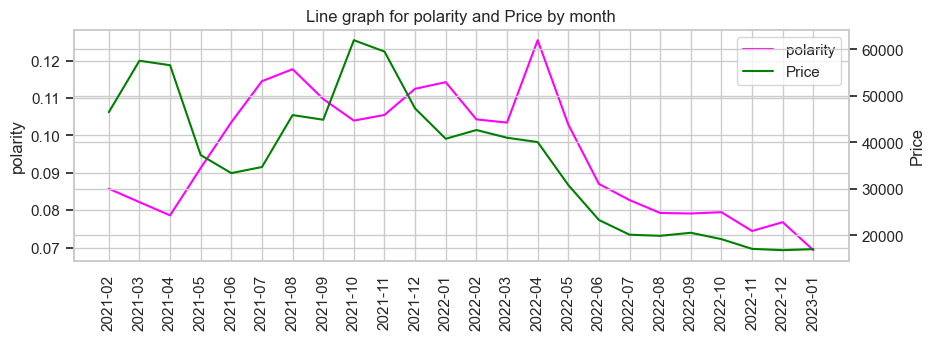

In [261]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the text_count
polarity = ax.plot(monthly['year_month'], monthly['polarity'], label='polarity', color='magenta')

# Plot the Volume
ax2 = ax.twinx()
Price =ax2.plot(monthly['year_month'], monthly['Price'], label='Price', color='green')

# Set the labels and titles
ax.set_ylabel("polarity")
ax2.set_ylabel("Price")
plt.title('Line graph for polarity and Price by month')

# concatenate graphs and legend
add = polarity + Price
leg = [l.get_label() for l in add]
ax.legend(add, leg, loc=1)

# Rotate the x-axis tick labels vertically
ax.get_xaxis().set_tick_params(rotation=90)

# Show the plot
plt.show()

### after July 2021

In [262]:
exclude_before_july = monthly[monthly['year_month']>'2021-06']

In [84]:
exclude_before_july.head()

,year_month,tweet_count,polarity,subjectivity,sentiment,Price,Volume
5,2021-07,20738.842105,0.115094,0.315134,0.301574,34716.226871,2.724305e+10
6,2021-08,21609.666667,0.118514,0.313540,0.322641,45884.187717,3.455277e+10
7,2021-09,19240.000000,0.110752,0.319361,0.291892,44883.910156,3.915467e+10
8,2021-10,31169.222222,0.104689,0.301532,0.299317,61989.938802,3.959017e+10
9,2021-11,28156.400000,0.106105,0.298477,0.289271,59539.787500,3.571025e+10


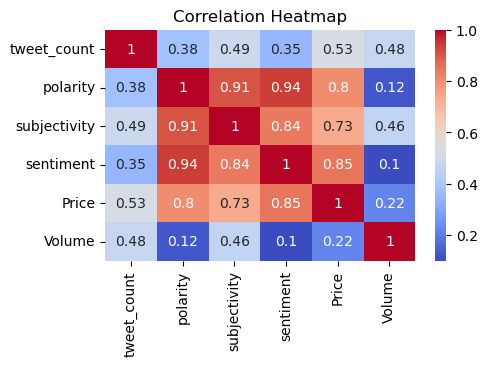

In [89]:
import seaborn as sns

# Assuming you have a DataFrame called 'df' with multiple columns

# Calculate the correlation matrix
correlation_matrix = exclude_before_july.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

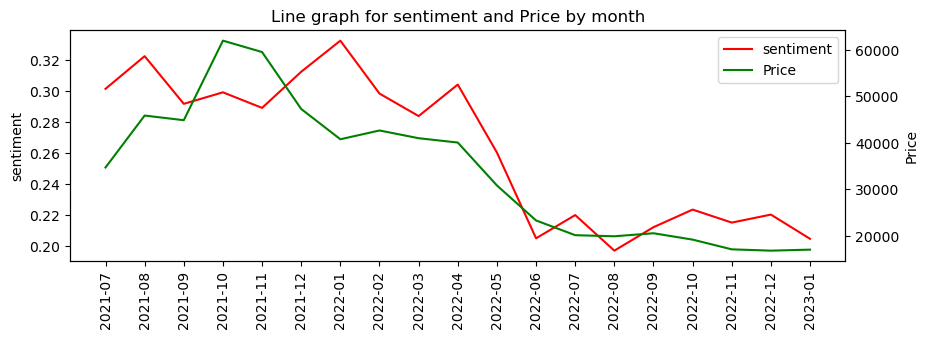

In [90]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the text_count
sentiment = ax.plot(exclude_before_july['year_month'], exclude_before_july['sentiment'], label='sentiment', color='red')

# Plot the Volume
ax2 = ax.twinx()
Price =ax2.plot(exclude_before_july['year_month'], exclude_before_july['Price'], label='Price', color='green')

# Set the labels and titles
ax.set_ylabel("sentiment")
ax2.set_ylabel("Price")
plt.title('Line graph for sentiment and Price by month')

# concatenate graphs and legend
add = sentiment + Price
leg = [l.get_label() for l in add]
ax.legend(add, leg, loc=1)

# Rotate the x-axis tick labels vertically
ax.get_xaxis().set_tick_params(rotation=90)

# Show the plot
plt.show()

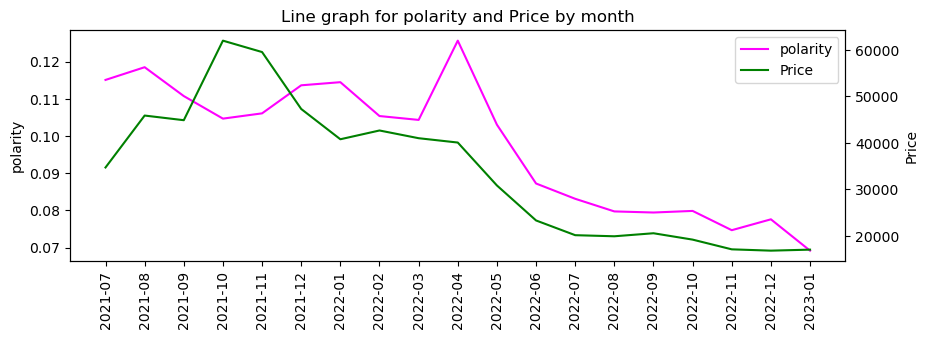

In [92]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the text_count
polarity = ax.plot(exclude_before_july['year_month'], exclude_before_july['polarity'], label='polarity', color='magenta')

# Plot the Volume
ax2 = ax.twinx()
Price =ax2.plot(exclude_before_july['year_month'], exclude_before_july['Price'], label='Price', color='green')

# Set the labels and titles
ax.set_ylabel("polarity")
ax2.set_ylabel("Price")
plt.title('Line graph for polarity and Price by month')

# concatenate graphs and legend
add = polarity + Price
leg = [l.get_label() for l in add]
ax.legend(add, leg, loc=1)

# Rotate the x-axis tick labels vertically
ax.get_xaxis().set_tick_params(rotation=90)

# Show the plot
plt.show()